<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/EspectroscopiaGama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estrutura da Matéria III**

Modalidade: Experimental

Alunos: Danielle Lessa, Tayan Sequeira e Úrsula Goulart

Professor: Dr. Wagner de Paula


---

# Experimento 2: Espectroscopia de Raios Gama

Objetivo: Encontrar um método de calibração utilizando os conjuntos de dados do Césio 137, Sódio 22 e Bário 133, a fim de determinar os isótopos **A**, **B**, **C**, **D** e **E**.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

| Isótopo  |  Meia-vida  | Picos de emissão $\gamma$ de interesse |
| :-----:  |  :-------:  | :------------------------------------: |
| Cs-137   |  30,2 anos  | 662 keV                                |
| Ba-133   |  10,5 anos  | 81/ 353 keV                            |
| Na-22    |  2,60 anos  | 511/ 1275 keV                          |

Fonte: [http://www.nucleide.org/Laraweb/index.php](http://www.nucleide.org/Laraweb/index.php)

## 1. Evento de Fundo

É necessário fazer o plot dos eventos de fundo, para que posteriormente se faça uma comparação visual com os gráficos dos demais espectros, a fim de entender se os picos vistos é sinal ou ruído. Quando igual ou muito próximo do pico encontrado nos dados do _background_, isso significa que o pico do espectro do isótopo analisado é ruído.


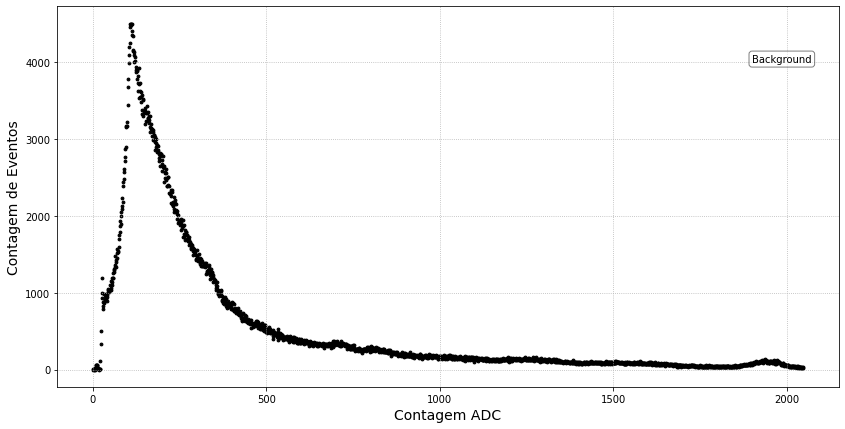

In [145]:
dataBack = pd.read_table('background.tsv', skiprows=22)

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataBack['Chan'], dataBack['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize = '14')
plt.ylabel('Contagem de Eventos', fontsize = '14')
ax.text(1900, 4000, 'Background', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('background.png', transparent = True)
plt.grid(linestyle='dotted')


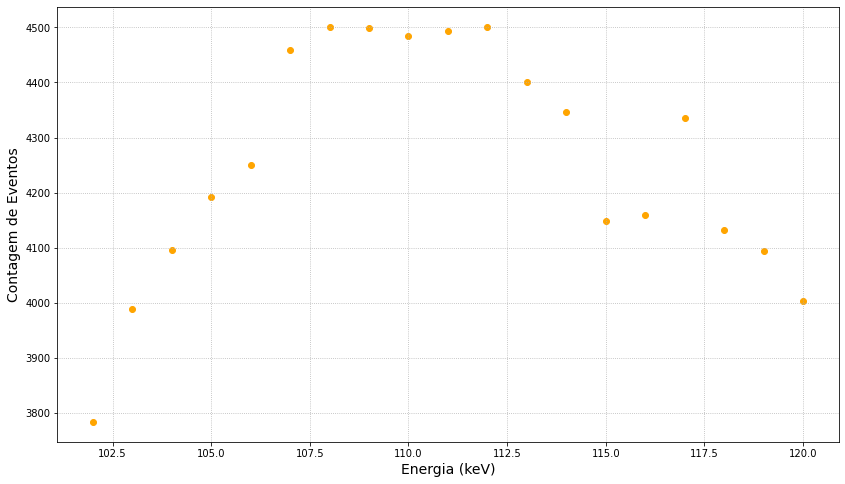

In [146]:
dataBack_peak = dataBack[(dataBack['Chan']>=102)&(dataBack['Chan']<=120)]

fig = plt.subplots(figsize=(14,8))
plt.scatter(dataBack_peak['Chan'], dataBack_peak['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

In [147]:
def GaussBack(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataBack_peak['Counts'])
p0 = (1000, 112.4, 18) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptBack, pcovBack = curve_fit(GaussBack, dataBack_peak['Chan'], dataBack_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

errorBack = [np.sqrt(pcovBack[i, i]) for i in np.arange(3)] #Diagonal principal da matriz

In [148]:
poptBack, errorBack

(array([4470.22002603,  111.19406467,   17.25896664]),
 [32.98358667979593, 0.2773230428143805, 0.9725656690134408])

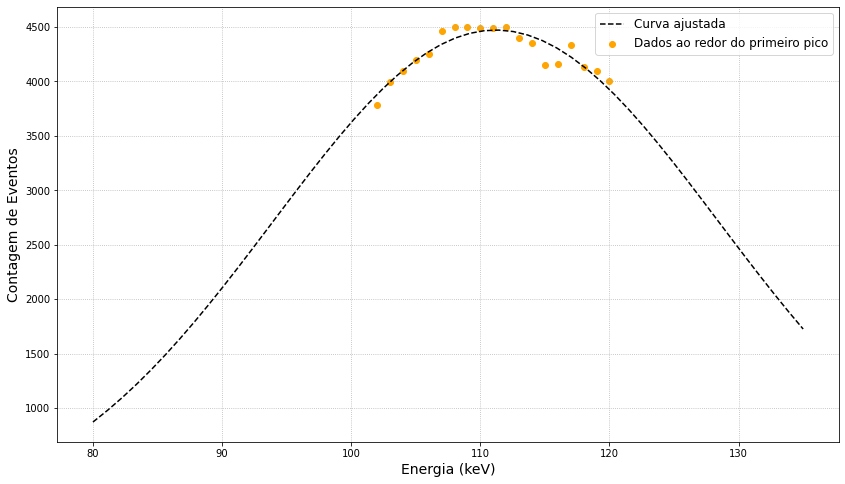

In [149]:
fig = plt.subplots(figsize=(14,8))

x_Back = np.linspace(80, 135)
plt.plot(x_Back, GaussBack(x_Back, *poptBack), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataBack_peak['Chan'], dataBack_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('PeakFit_Back.png', transparent = True)
plt.grid(linestyle='dotted')

Para encontrar a reta de calibração, é necessário:

1. Determinar os picos de interesse do nuclídeo

2. Selecionar uma seção de área, para que seja possível fazer o ajuste Gaussiano para cada pico, utilizando o _**curve_fit**_.

## 2. Sódio 22

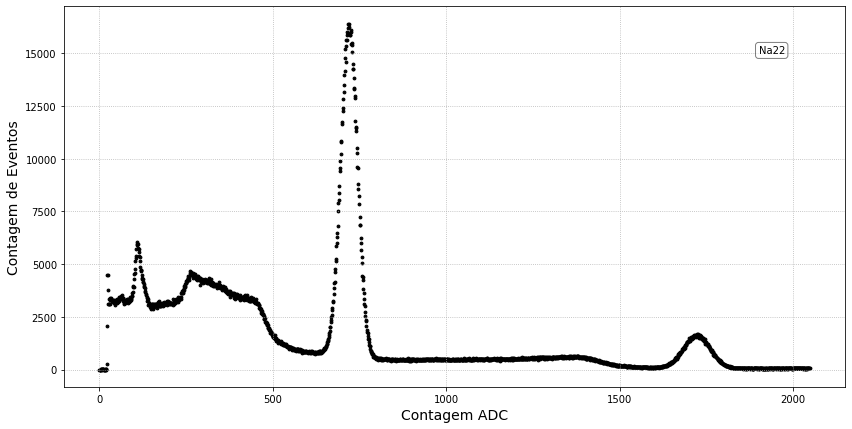

In [150]:
dataNa22 = pd.read_table('Na22.tsv', skiprows=18)

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataNa22['Chan'], dataNa22['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1900, 15000, 'Na22', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('Na22.png', transparent = True)
plt.grid(linestyle='dotted')

###2.1. Gráficos seção de área do Sódio 22

Para que os gráficos abaixo fossem feitos, pegamos pontos ao redor dos picos de modo que não fosse considerado a calda, afinal caso isso tivesse sido feito teriamos que escrever duas gaussianas para cada pico.

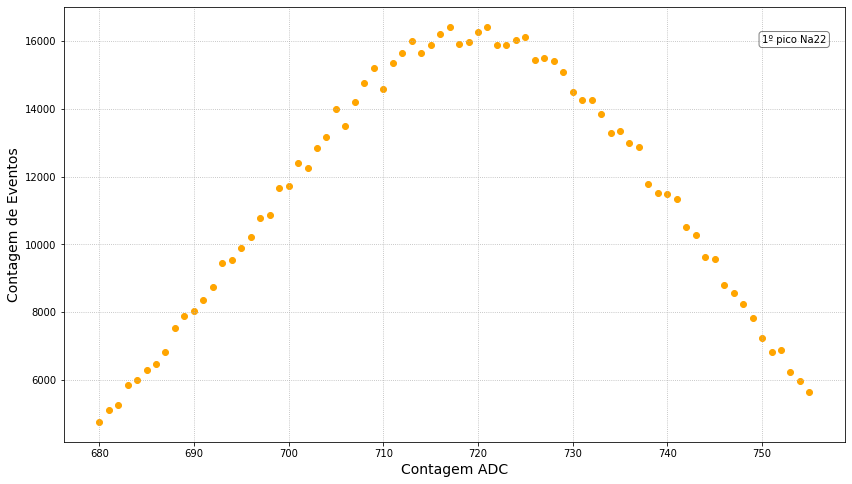

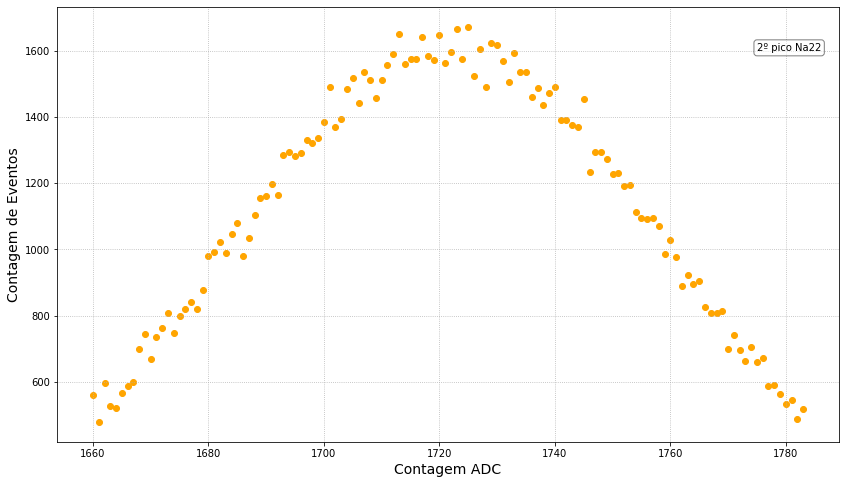

In [151]:
#Primeiro pico Na-22
data1Na22_peak = dataNa22[(dataNa22['Chan']>=680)&(dataNa22['Chan']<=755)]

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(data1Na22_peak['Chan'], data1Na22_peak['Counts'], c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(750, 15950, '1º pico Na22', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.savefig('Peak1_Na22.png', transparent = True)
plt.grid(linestyle='dotted')

#Segundo pico Na-22
data2Na22_peak = dataNa22[(dataNa22['Chan']>=1660)&(dataNa22['Chan']<=1783)]

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(data2Na22_peak['Chan'], data2Na22_peak['Counts'], c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1775, 1600, '2º pico Na22', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.savefig('Peak2_Na22.png', transparent = True)
plt.grid(linestyle='dotted')

###2.2. Calibração Sódio 22

#### 2.2.1. Primeiro pico do Sódio 22

In [152]:
def Gauss1Na22(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(data1Na22_peak['Counts'])
p0 = (1000, 720, 85) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1Na22, pcov1Na22 = curve_fit(Gauss1Na22, data1Na22_peak['Chan'], data1Na22_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error1Na22 = [np.sqrt(pcov1Na22[i, i]) for i in np.arange(3)] #Diagonal principal da matriz

In [153]:
popt1Na22, error1Na22

(array([16144.27856975,   719.18058862,   -24.78733406]),
 [47.01301311026061, 0.0703034486640832, 0.08716912116380704])

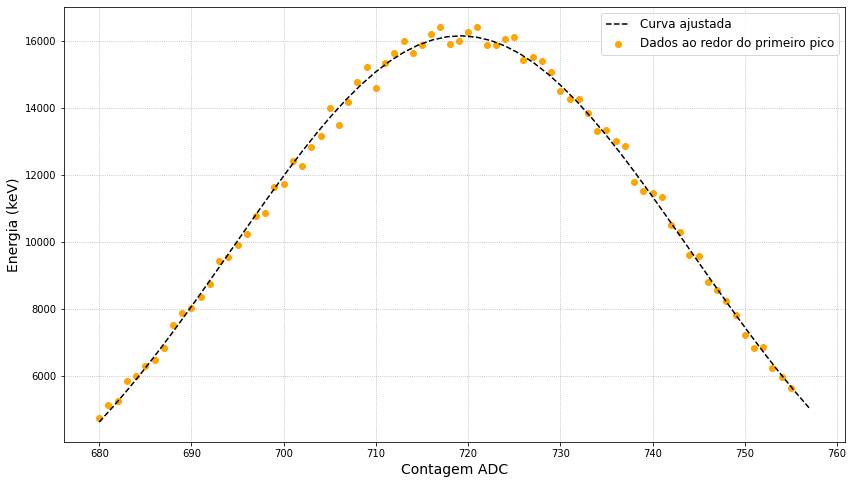

In [154]:
fig = plt.subplots(figsize=(14,8))

x_na1 = np.linspace(680, 757)
plt.plot(x_na1, Gauss1Na22(x_na1, *popt1Na22), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data1Na22_peak['Chan'], data1Na22_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Energia (keV)', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak1Fit_Na22.png', transparent = True)
plt.grid(linestyle='dotted')

#### 2.2.2. Segundo Pico do Sódio 22

In [155]:
def Gauss2Na22(x, A, mean, sigma): #Gaussiana para o segundo pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(data2Na22_peak['Counts'])
p0 = (1000, 1738, 130) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2Na22, pcov2Na22 = curve_fit(Gauss2Na22, data2Na22_peak['Chan'], data2Na22_peak['Counts'], sigma=sigma, p0=p0)

error2Na22 = [np.sqrt(pcov2Na22[i, i]) for i in np.arange(3)]

In [156]:
popt2Na22

array([1600.86953789, 1721.44449459,   39.77057873])

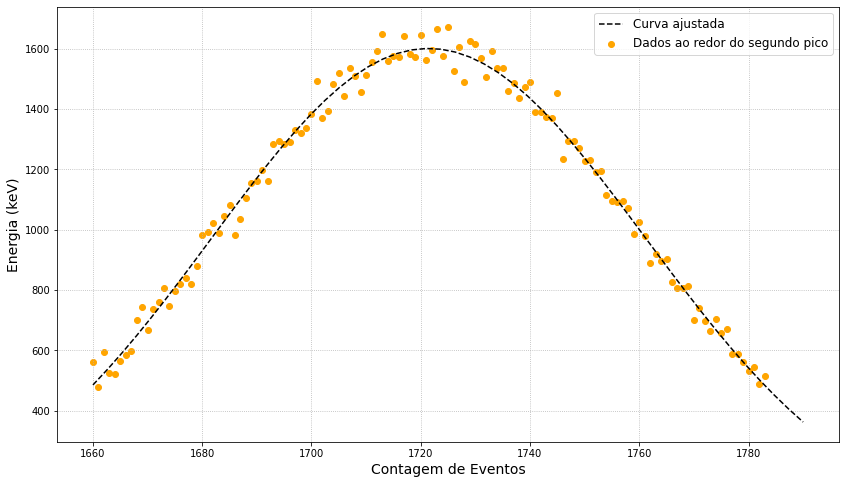

In [157]:
fig = plt.subplots(figsize=(14, 8))

x_na2 = np.linspace(1660, 1790)
plt.plot(x_na2, Gauss2Na22(x_na2, *popt2Na22), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data2Na22_peak['Chan'], data2Na22_peak['Counts'], c='orange', label='Dados ao redor do segundo pico')
plt.xlabel('Contagem de Eventos', fontsize='14')
plt.ylabel('Energia (keV)', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak2Fit_Na22.png', transparent = True)
plt.grid(linestyle='dotted')

## 3. Césio 137

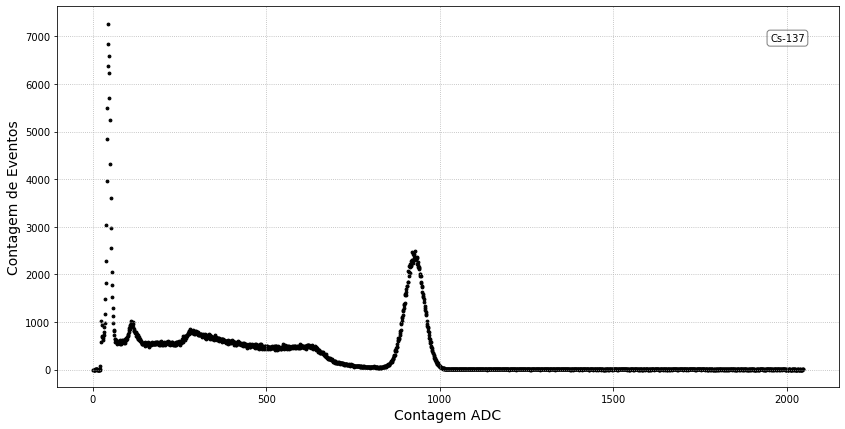

In [158]:
dataCs137 = pd.read_table('Cs137.tsv', skiprows=18)

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataCs137['Chan'], dataCs137['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1952, 6900, 'Cs-137', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('Cs137.png', transparent = True)
plt.grid(linestyle='dotted')

###3.1. Gráficos seção de área do Césio 137
Para que o gráfico abaixo fosse feito, pegamos pontos ao redor do pico de modo que não fosse considerado a calda, afinal caso isso tivesse sido feito teriamos que escrever duas gaussianas para o pico.

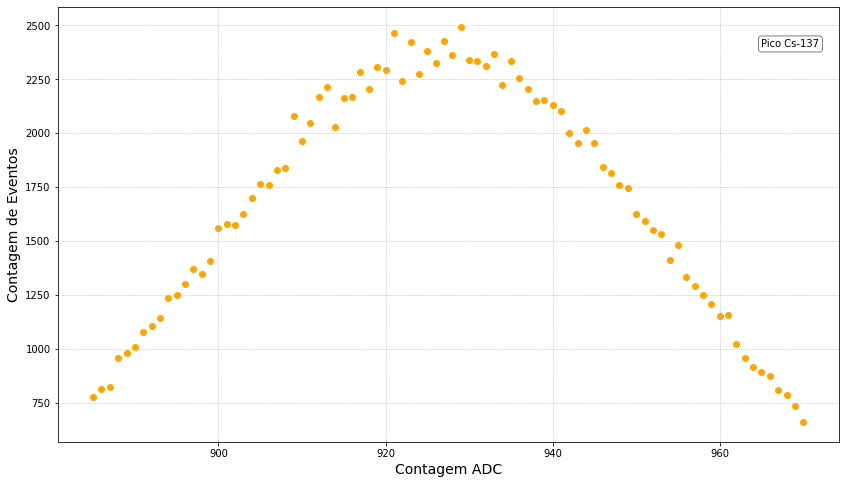

In [159]:
data1Cs137_peak = dataCs137[(dataCs137['Chan']>=885)&(dataCs137['Chan']<=970)]

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(data1Cs137_peak['Chan'], data1Cs137_peak['Counts'], c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(965, 2400, 'Pico Cs-137', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.savefig('Peak_Cs137.png', transparent = True)
plt.grid(linestyle='dotted')

#### 3.2. Calibração Césio 137

In [160]:
def GaussCs137(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(data1Cs137_peak['Counts'])
p0 = (1000, 928, 80) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptCs137, pcovCs137 = curve_fit(GaussCs137, data1Cs137_peak['Chan'], data1Cs137_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

errorCs137 = [np.sqrt(pcovCs137[i, i]) for i in np.arange(3)] 

In [161]:
poptCs137

array([2379.69689917,  926.47474909,  -27.69290856])

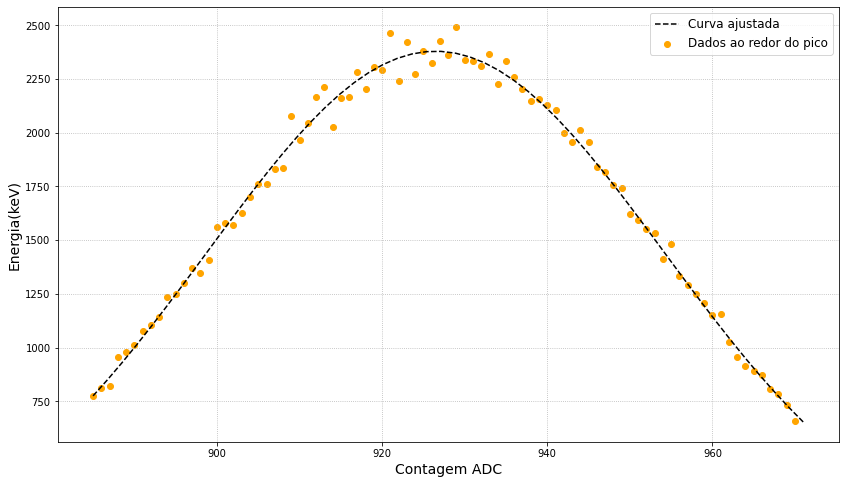

In [162]:
fig = plt.subplots(figsize=(14,8))
x_cs = np.linspace(885, 971)
plt.plot(x_cs, GaussCs137(x_cs, *poptCs137), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data1Cs137_peak['Chan'], data1Cs137_peak['Counts'], c='orange', label='Dados ao redor do pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Energia(keV)', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('PeakFit1_Cs137.png', transparent = True)
plt.grid(linestyle='dotted')

## 4. Bário 133

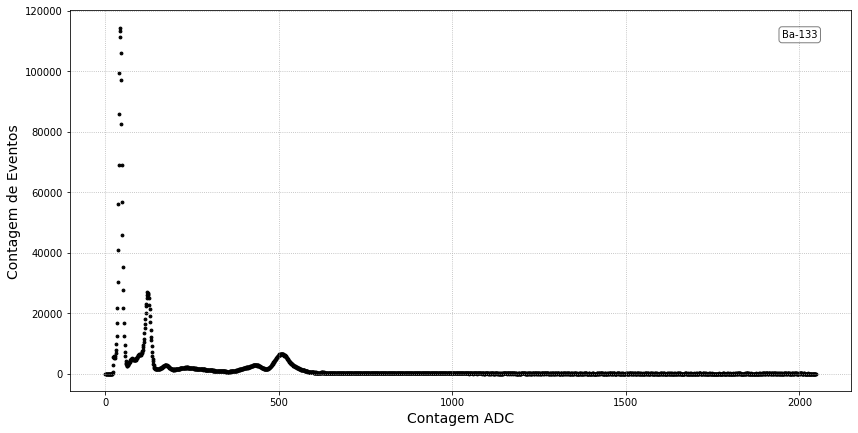

In [163]:
dataBa133 = pd.read_table('Ba133.tsv', skiprows=18)

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataBa133['Chan'], dataBa133['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1950, 111000, 'Ba-133', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('Ba133.png', transparent = True)
plt.grid(linestyle='dotted')

**Observação**: No item 1, pode ser visto o pico encontrado para o espectro de fundo, que foi igual a _108_, muito próximo do primeiro pico do espectro do isótopo do Bário 133. Portanto, esse primeiro pico é um ruído e não sinal.

Por isso, não será cálculado a _gaussiana_ desse primeiro pico.

###4.1. Gráficos seção de área do Bário 133

Para que os gráficos abaixo fossem feitos, pegamos pontos ao redor do pico de modo que não fosse considerado a calda, afinal caso isso tivesse sido feito teriamos que escrever duas gaussianas para cada pico.

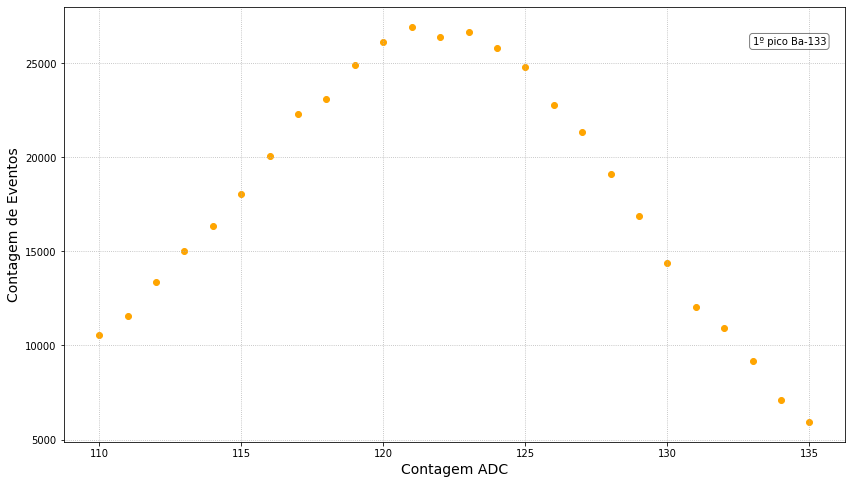

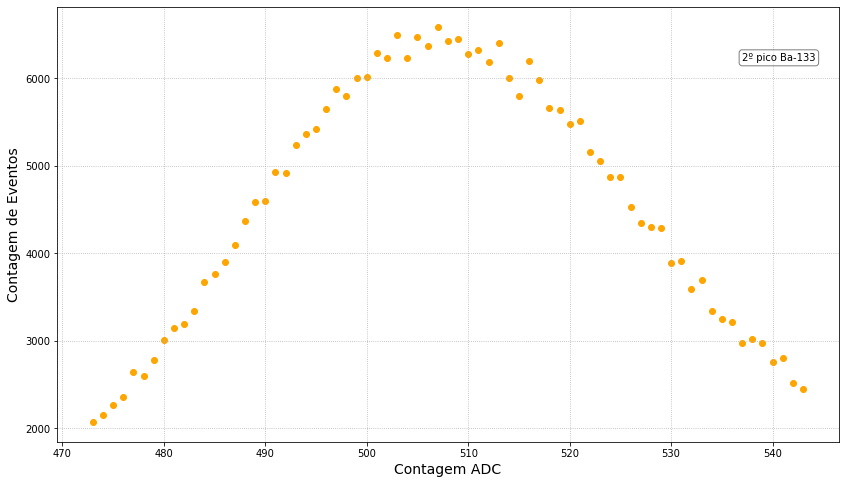

In [164]:
#Primeiro pico Ba-133
data1Ba133_peak = dataBa133[(dataBa133['Chan']>=110)&(dataBa133['Chan']<=135)]

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(data1Ba133_peak['Chan'], data1Ba133_peak['Counts'], c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(133, 26000, '1º pico Ba-133', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.savefig('Peak1_Ba133.png', transparent = True)
plt.grid(linestyle='dotted')

#Segundo pico Ba-133
data2Ba133_peak = dataBa133[(dataBa133['Chan']>=473)&(dataBa133['Chan']<=543)]

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(data2Ba133_peak['Chan'], data2Ba133_peak['Counts'], c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(537, 6200, '2º pico Ba-133', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.savefig('Peak2_Ba133.png', transparent = True)
plt.grid(linestyle='dotted')

### 4.2 Calibração

####4.2.1. Primeiro pico do Bário 133

In [165]:
def Gauss1Ba133(x, A, mean, sigma): #Gaussiana para o segundo pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(data1Ba133_peak['Counts'])
p0 = (1000, 122, 25) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1Ba133, pcov1Ba133 = curve_fit(Gauss1Ba133, data1Ba133_peak['Chan'], data1Ba133_peak['Counts'], sigma=sigma, p0=p0)

error1Ba133 = [np.sqrt(pcov1Ba133[i, i]) for i in np.arange(3)]

In [166]:
popt1Ba133, error1Ba133

(array([ 2.65149316e+04,  1.21435843e+02, -7.89973658e+00]),
 [252.07048569440366, 0.07206719838828979, 0.0824931512287545])

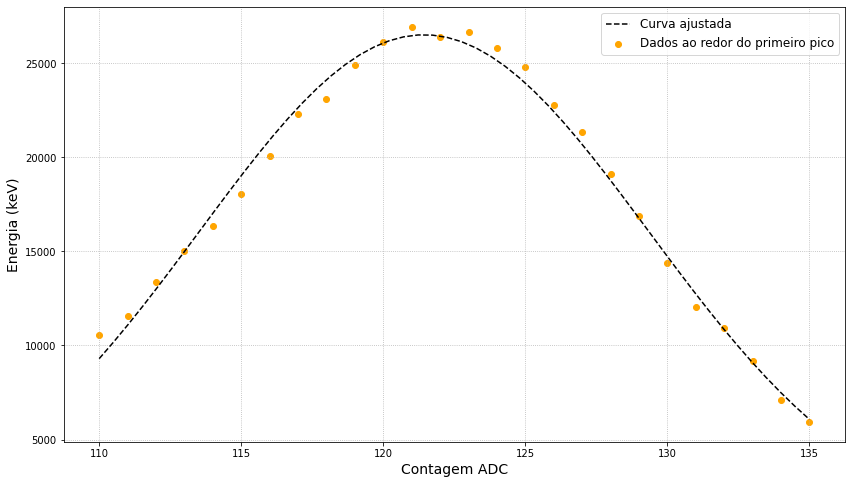

In [167]:
fig = plt.subplots(figsize=(14,8))

x_ba1 = np.linspace(110, 135)
plt.plot(x_ba1, Gauss1Ba133(x_ba1, *popt1Ba133), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data1Ba133_peak['Chan'], data1Ba133_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Energia (keV)', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak1Fit_Ba133.png', transparent = True)
plt.grid(linestyle='dotted')

####4.2.2. Segundo pico do Bário 133

In [168]:
def Gauss2Ba133(x, A, mean, sigma): #Gaussiana para o segundo pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(data2Ba133_peak['Chan'])
p0 = (1000, 508, 70) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2Ba133, pcov2Ba133 = curve_fit(Gauss2Ba133, data2Ba133_peak['Chan'], data2Ba133_peak['Counts'], sigma=sigma, p0=p0)

error2Ba133 = [np.sqrt(pcov2Ba133[i, i]) for i in np.arange(3)]

In [169]:
popt2Ba133, error2Ba133

(array([6372.17372132,  508.25782698,   23.25002609]),
 [32.34144144784133, 0.14123869883495888, 0.18219219599600217])

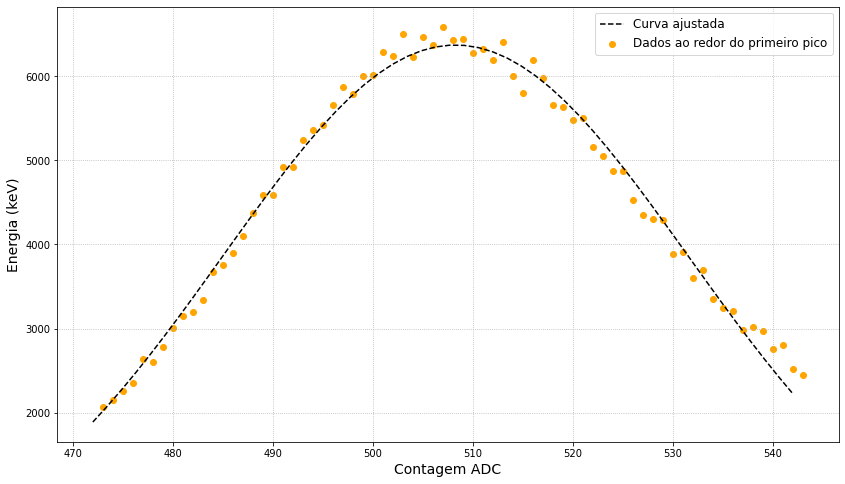

In [170]:
fig = plt.subplots(figsize=(14,8))

x_ba2 = np.linspace(472, 542)
plt.plot(x_ba2, Gauss2Ba133(x_ba2, *popt2Ba133), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data2Ba133_peak['Chan'], data2Ba133_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Energia (keV)', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak2Fit_Ba133.png', transparent = True)
plt.grid(linestyle='dotted')

## 5. Reta Ajustada (Reta de Calibração)

Usando os picos de emissão gama dos isótopos: *ba133*, *Cs137* e *Na22* estimados anteriormente, é possível escrever um método de calibração, permitindo que descubramos quais são os isótopos *A*, *B*, *C*, *D* e *E*.

Será feito um ajuste linear e um quadrático, com o objetivo de entender se a aplicação desses ajustes causam diferença significativa. Para ambos foi usado o pacote _polyfit_. Por fim, optou-se pelo ajuste polinomial de grau 2.

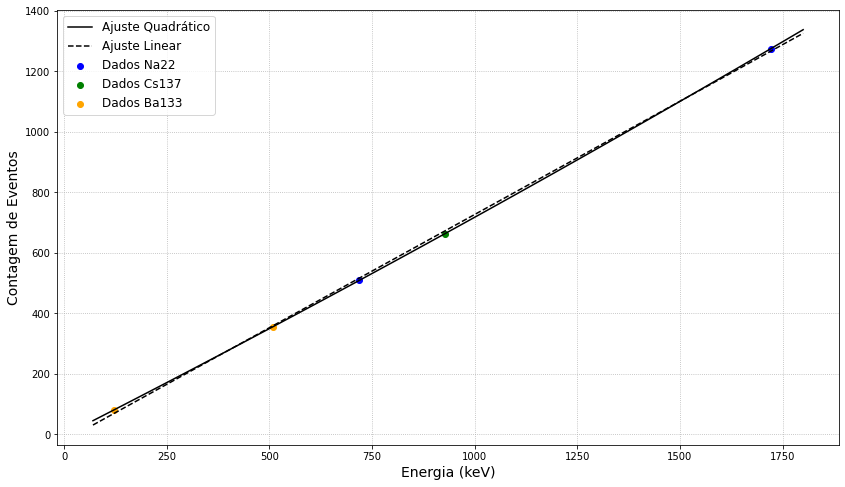

In [171]:
means = [popt1Na22[1], popt2Na22[1], poptCs137[1], popt1Ba133[1], popt2Ba133[1]]
sigmas = [popt1Na22[2], popt2Na22[2], poptCs137[2], popt1Ba133[2], popt2Ba133[2]]
energy = [ 511, 1275, 662, 81, 353 ] #Energia de referência

coef, covar = np.polyfit(means, energy, 1, cov=True)
p = np.poly1d(coef)
error = [np.sqrt(covar[i, i]) for i in np.arange(2)]

coef1, covar1 = np.polyfit(means, energy, 2, cov=True)
p1 = np.poly1d(coef1)
error1 = [np.sqrt(covar1[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,8))
xp = np.linspace(70, 1800)
plt.scatter((popt1Na22[1], popt2Na22[1]), (energy[0], energy[1]), c='blue', label='Dados Na22')
plt.scatter(poptCs137[1], energy[2], c='green', label='Dados Cs137')
plt.scatter((popt1Ba133[1], popt2Ba133[1]), (energy[3], energy[4]), c='orange', label='Dados Ba133')
plt.plot(xp, coef1[0]*np.power(xp, 2) + coef1[1]*xp + coef1[2], c='black', label='Ajuste Quadrático')
plt.plot(xp, coef[0]*xp + coef[1], linestyle='--', c='black', label='Ajuste Linear')

plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('calibration_curve.png', transparent = True)
plt.grid(linestyle='dotted')

In [172]:
coef, error

(array([  0.74880575, -22.16439331]), [0.0092767436289082, 8.909557683366554])

In [173]:
coef1, error1

(array([ 2.99157485e-05,  6.91494120e-01, -3.94624773e+00]),
 [3.5702494000481206e-06, 0.007096318504587174, 2.832857551800447])

##6. Isótopos desconhecidos

|     | Isótopo  |  Meia-vida  | Picos de emissão $\gamma$ de interesse |
| :-: | :-----:  |  :-------:  | :------------------------------------: |
| A   |  Co-60   |  5,27 anos  | 1173/ 1332 keV                    |
| B   |  Ag-100  |  0,68 anos  | 657/ 937 keV                      |
| C   |  Rb-90m  |  4,3 anos   | 931 keV                           |
| D   |  Nd-147  |  10,987 dias  | 91 keV                          |
| E   |  Co-57   |  0,74 anos  | 122 keV                           |

###6.1. Isótopo A - Cobalto 60

Fazendo uma comparação entre os picos de energia de referência e os estimados através do uso da reta de calibração, estima-se que o isótopo A é o isótopo do Cobalto 60.

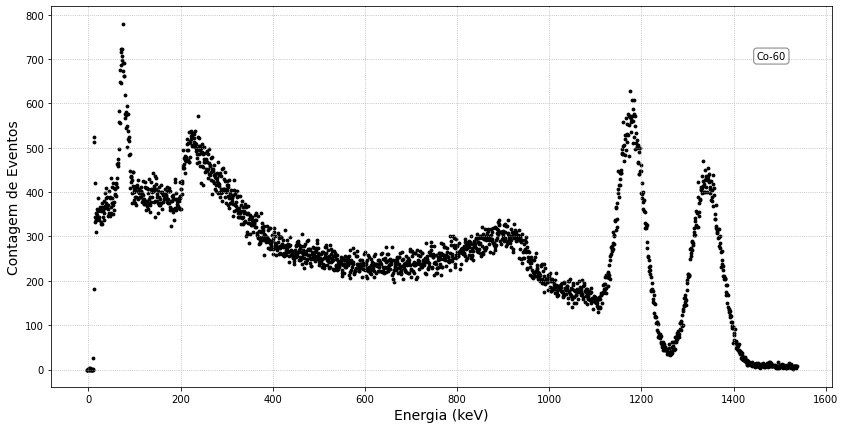

In [174]:
dataA = pd.read_table('A.tsv', skiprows=18)
dataA['Energy'] = coef1[0]*np.power(dataA['Chan'], 2) + coef1[1]*dataA['Chan'] + coef1[2]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataA['Energy'], dataA['Counts'], s=8, color='black')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.xlabel('Energia (keV)', fontsize='14')
ax.text(1450, 700, 'Co-60', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('dataA_Co60.png', transparent = True)
plt.grid(linestyle='dotted')

####6.1.1. Gráficos de seção de área

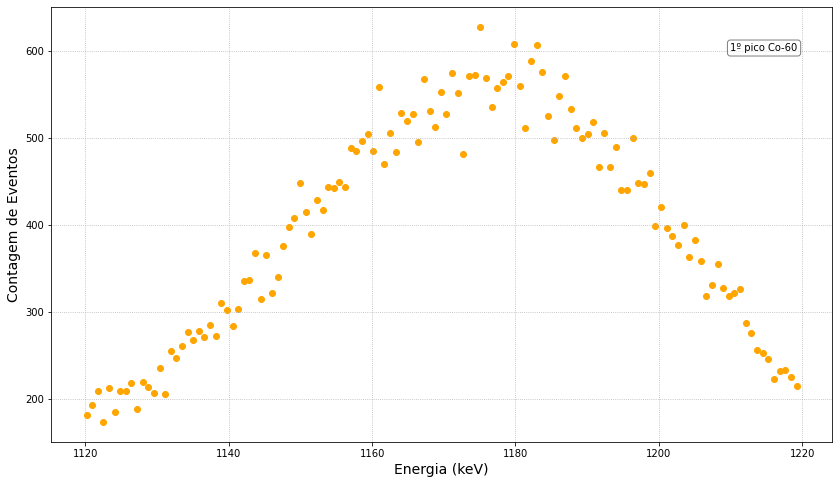

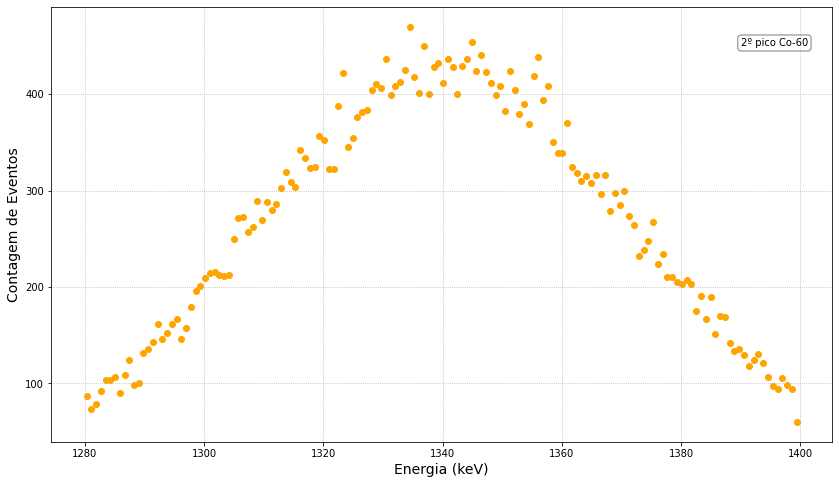

In [175]:
#Primeiro pico
dataA_peak_1 = dataA[(dataA['Energy']>=1120)&(dataA['Energy']<=1220)]

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(dataA_peak_1['Energy'], dataA_peak_1['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1210, 600, '1º pico Co-60', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

#Primeiro pico
dataA_peak_2 = dataA[(dataA['Energy']>=1280)&(dataA['Energy']<=1400)]

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(dataA_peak_2['Energy'], dataA_peak_2['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1390, 450, '2º pico Co-60', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

####6.1.2. Calibração

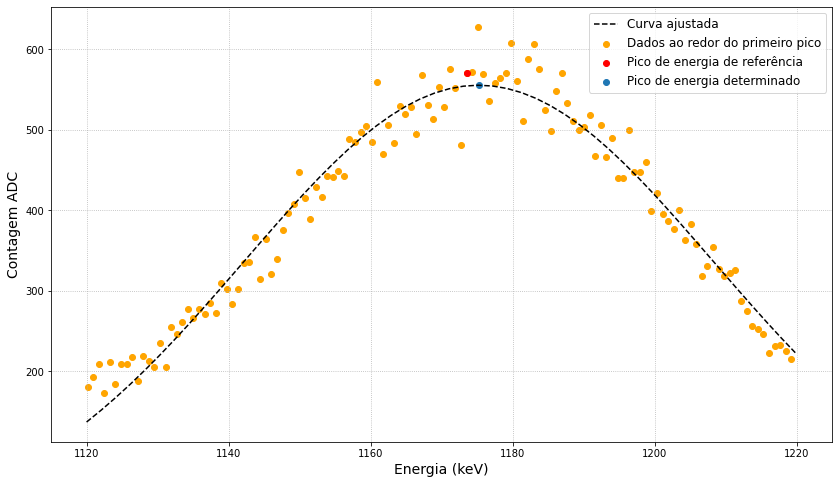

In [176]:
#Primeiro pico
def Gauss1A(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataA_peak_1['Energy'])
p0 = (1000, 1170, 100) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1A, pcov1A = curve_fit(Gauss1A, dataA_peak_1['Energy'], dataA_peak_1['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error1A = [np.sqrt(pcov1A[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,8))

x1_A = np.linspace(1120, 1220)
plt.plot(x1_A, Gauss1A(x1_A, *popt1A), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataA_peak_1['Energy'], dataA_peak_1['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(1173.505655, 571, c='r', label='Pico de energia de referência')
plt.scatter(popt1A[1],popt1A[0], label='Pico de energia determinado')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem ADC', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak1Fit_A.png', transparent = True)
plt.grid(linestyle='dotted')

In [177]:
popt1A, error1A

(array([ 555.3389068 , 1175.21285881,  -33.022283  ]),
 [4.045605216536007, 0.2970245121775579, 0.3801697995822369])

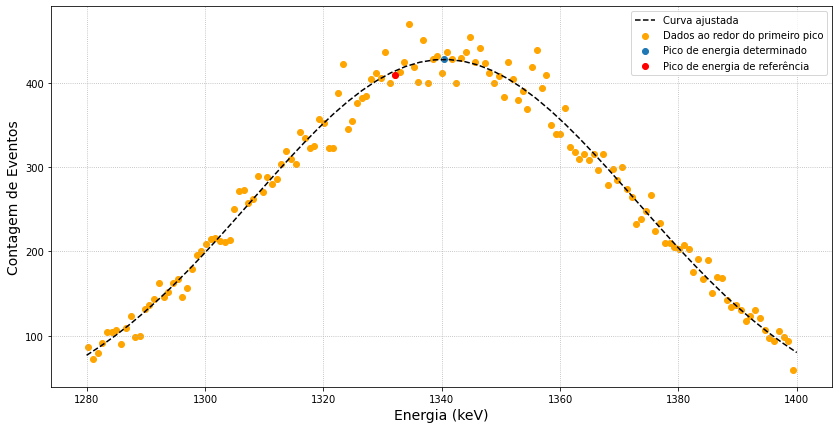

In [178]:
def Gauss2A(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataA_peak_2['Energy'])
p0 = (1000, 1335, 120) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2A, pcov2A = curve_fit(Gauss2A, dataA_peak_2['Energy'], dataA_peak_2['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error2A = [np.sqrt(pcov2A[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x2_A = np.linspace(1280, 1400)
plt.plot(x2_A, Gauss2A(x2_A, *popt2A), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataA_peak_2['Energy'], dataA_peak_2['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(popt2A[1],popt2A[0], label='Pico de energia determinado')
plt.scatter(1332.064900, 409, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.savefig('Peak2Fit_A.png', transparent = True)
plt.grid(linestyle='dotted')

In [179]:
popt2A, error2A

(array([ 427.51643773, 1340.37174283,  -32.58476527]),
 [2.4910959805838395, 0.22047272314100416, 0.24999625886207133])

###6.2. Isótopo B

Fazendo uma comparação entre os picos de energia de referência e os estimados através do uso da reta de calibração, estima-se que o isótopo B é o isótopo do Argônio 110.

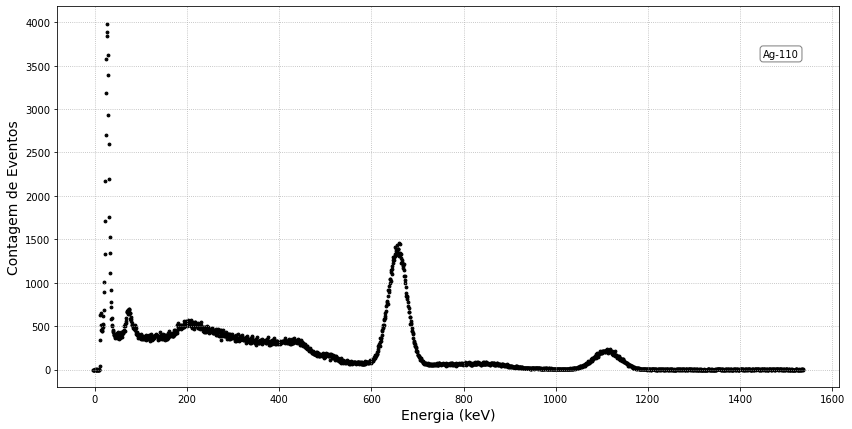

In [180]:
dataB = pd.read_table('B.tsv', skiprows=18)
dataB['Energy'] = coef1[0]*np.power(dataB['Chan'], 2) + coef1[1]*dataB['Chan'] + coef1[2]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataB['Energy'], dataB['Counts'], s=8, color='black')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.xlabel('Energia (keV)', fontsize='14')
ax.text(1450, 3600, 'Ag-110', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('dataB.png', transparent = True)
plt.grid(linestyle='dotted')

####6.2.1. Gráficos seção de área


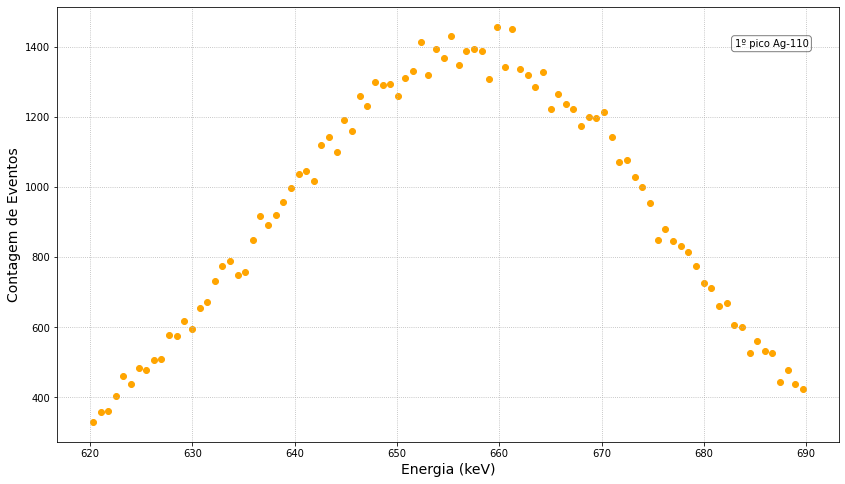

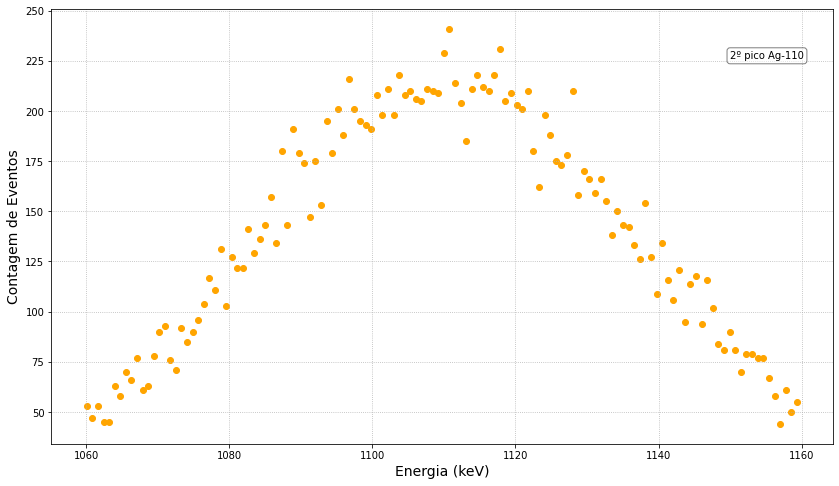

In [181]:
#Primeiro pico
dataB_peak_1 = dataB[(dataB['Energy']>=620)&(dataB['Energy']<=690)]

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(dataB_peak_1['Energy'], dataB_peak_1['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(683, 1400, '1º pico Ag-110', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

#Segundo pico
dataB_peak_2 = dataB[(dataB['Energy']>=1060)&(dataB['Energy']<=1160)]

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(dataB_peak_2['Energy'], dataB_peak_2['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1150, 226, '2º pico Ag-110', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

####6.2.2. Calibração

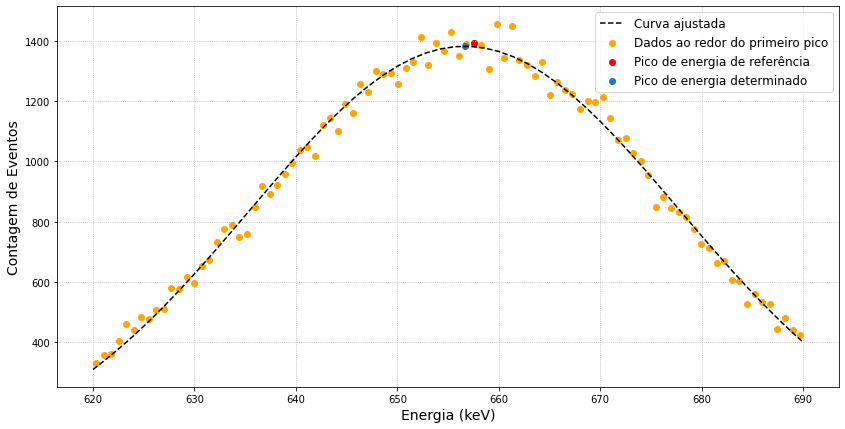

In [182]:
def Gauss1B(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataB_peak_1['Energy'])
p0 = (1000, 660, 70) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1B, pcov1B = curve_fit(Gauss1B, dataB_peak_1['Energy'], dataB_peak_1['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error1B = [np.sqrt(pcov1B[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x1_B = np.linspace(620, 690)
plt.plot(x1_B, Gauss1B(x1_B, *popt1B), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataB_peak_1['Energy'], dataB_peak_1['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(657.535488, 1393, c='r', label='Pico de energia de referência')
plt.scatter(popt1B[1],popt1B[0], label='Pico de energia determinado')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.savefig('Peak1Fit_B.png', transparent = True)
plt.grid(linestyle='dotted')

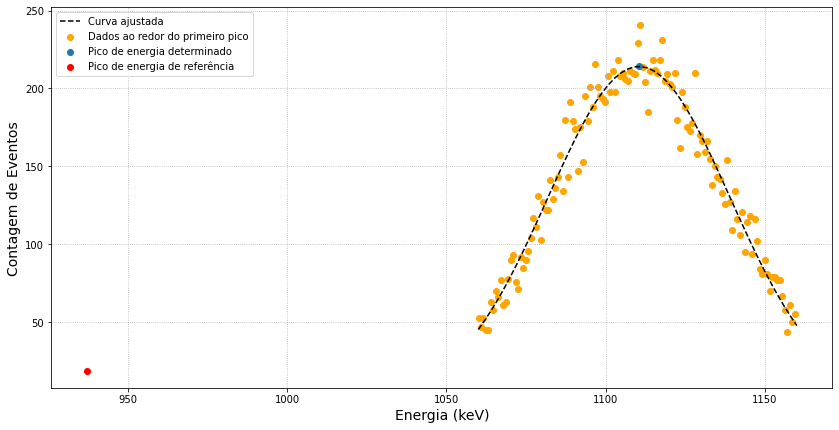

In [183]:
def Gauss2B(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataB_peak_2['Energy'])
p0 = (100, 1110, 100) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2B, pcov2B = curve_fit(Gauss2B, dataB_peak_2['Energy'], dataB_peak_2['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error2B = [np.sqrt(pcov2B[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x2_B = np.linspace(1060, 1160)
plt.plot(x2_B, Gauss2B(x2_B, *popt2B), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataB_peak_2['Energy'], dataB_peak_2['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(popt2B[1],popt2B[0], label='Pico de energia determinado')
plt.scatter(937.080563, 19, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.savefig('Peak2Fit_B.png', transparent = True)
plt.grid(linestyle='dotted')

In [184]:
popt1B, error1B, popt2B, error2B 

(array([1381.76598625,  656.64334929,  -21.17673626]),
 [6.290683552447156, 0.11399672151566376, 0.13798749926682538],
 array([ 214.10231209, 1110.44173552,   28.62274074]),
 [1.8277097422582147, 0.2853825949499172, 0.33380610663322463])

In [185]:
popt1B, error1B, popt2B, error2B

(array([1381.76598625,  656.64334929,  -21.17673626]),
 [6.290683552447156, 0.11399672151566376, 0.13798749926682538],
 array([ 214.10231209, 1110.44173552,   28.62274074]),
 [1.8277097422582147, 0.2853825949499172, 0.33380610663322463])

###6.3. Isótopo C

Fazendo uma comparação entre os picos de energia de referência e os estimados através do uso da reta de calibração, estima-se que o isótopo C é o isótopo do Rubídio 90m

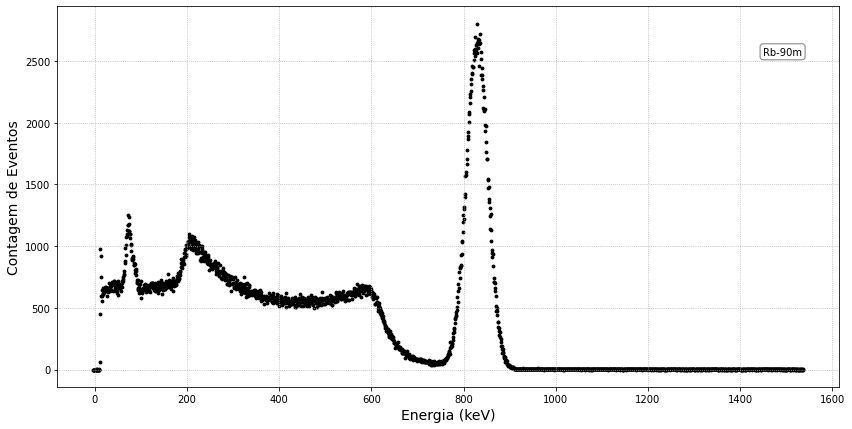

In [186]:
dataC = pd.read_table('C.tsv', skiprows=18)
dataC['Energy'] = coef1[0]*np.power(dataC['Chan'], 2) + coef1[1]*dataC['Chan'] + coef1[2]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataC['Energy'], dataC['Counts'], s=8, color='black')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1450, 2550, 'Rb-90m', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('dataC.png', transparent = True)
plt.grid(linestyle='dotted')

####6.3.1. Gráficos de seção de área

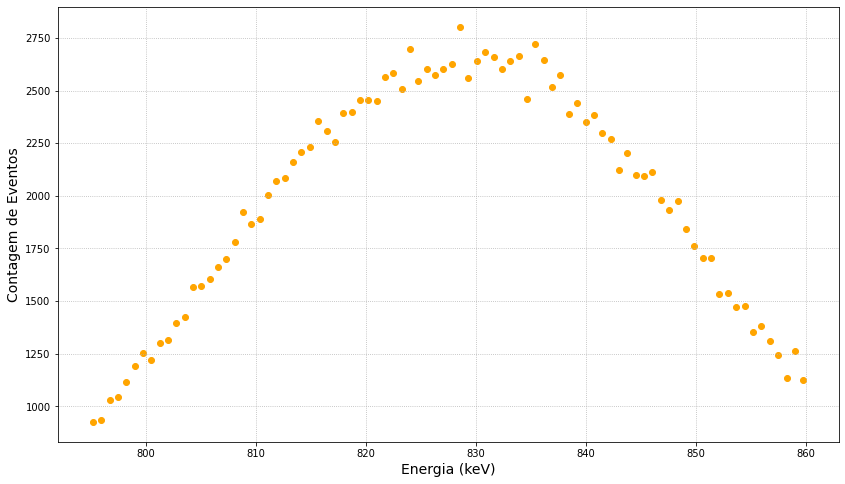

In [187]:
dataC_peak = dataC[(dataC['Energy']>=795)&(dataC['Energy']<=860)]
fig = plt.subplots(figsize=(14,8))
plt.scatter(dataC_peak['Energy'], dataC_peak['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

####6.3.2. Calibração

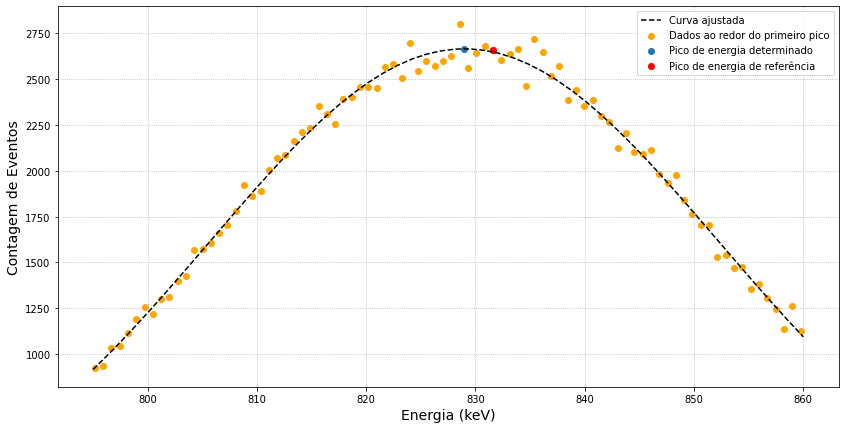

In [190]:
def GaussC(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataC_peak['Energy'])
p0 = (1000, 828, 65) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptC, pcovC = curve_fit(GaussC, dataC_peak['Energy'], dataC_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

errorC = [np.sqrt(pcovC[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x_C = np.linspace(795, 860)
plt.plot(x_C, GaussC(x_C, *poptC), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataC_peak['Energy'], dataC_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(poptC[1],poptC[0], label='Pico de energia determinado')
plt.scatter(831.581308, 2658, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.savefig('PeakFit_C.png', transparent = True)
plt.grid(linestyle='dotted')

In [191]:
poptC, errorC

(array([2665.47401155,  828.97871737,   23.25152119]),
 [9.958124671871843, 0.10709146482947908, 0.14731905651609095])

###6.4. Isótopo **D**

Fazendo uma comparação entre os picos de energia de referência e os estimados através do uso da reta de calibração, estima-se que o isótopo D é o isótopo do Neodímio 147.

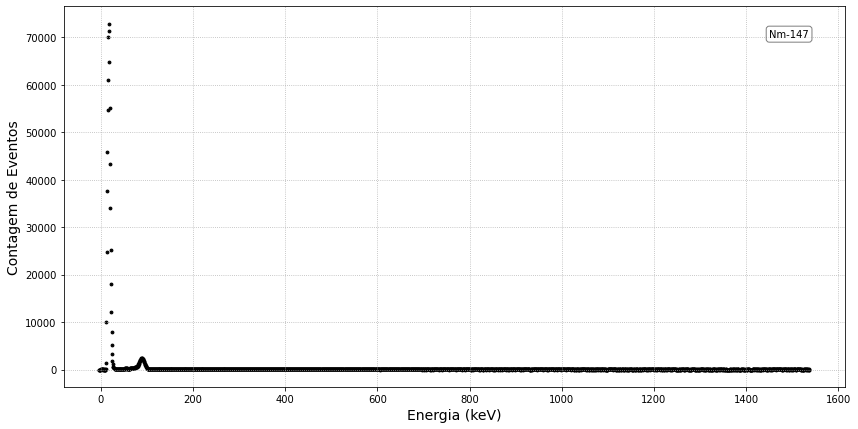

In [192]:
dataD = pd.read_table('D.tsv', skiprows=18)
dataD['Energy'] = coef1[0]*np.power(dataD['Chan'], 2) + coef1[1]*dataD['Chan'] + coef1[2]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataD['Energy'], dataD['Counts'], s=8, color='black')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1450, 70000, 'Nm-147', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('dataD.png', transparent = True)
plt.grid(linestyle='dotted')

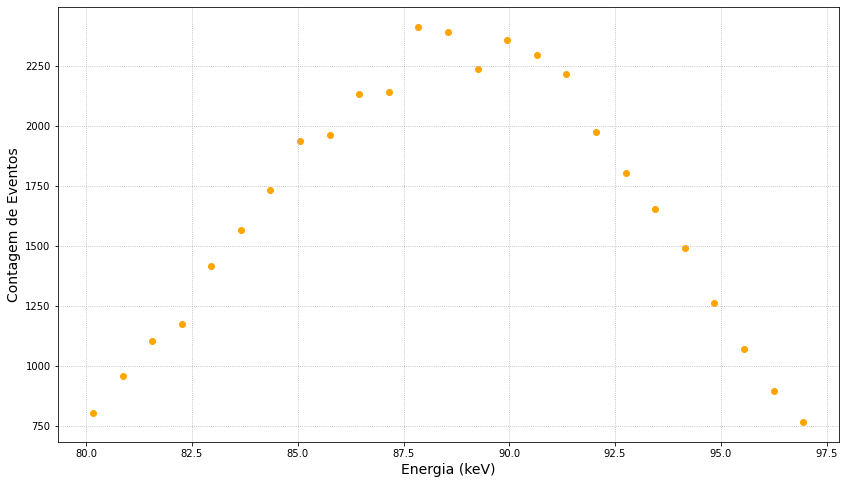

In [193]:
dataD_peak = dataD[(dataD['Energy']>=80)&(dataD['Energy']<=97)]
fig = plt.subplots(figsize=(14,8))
plt.scatter(dataD_peak['Energy'], dataD_peak['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

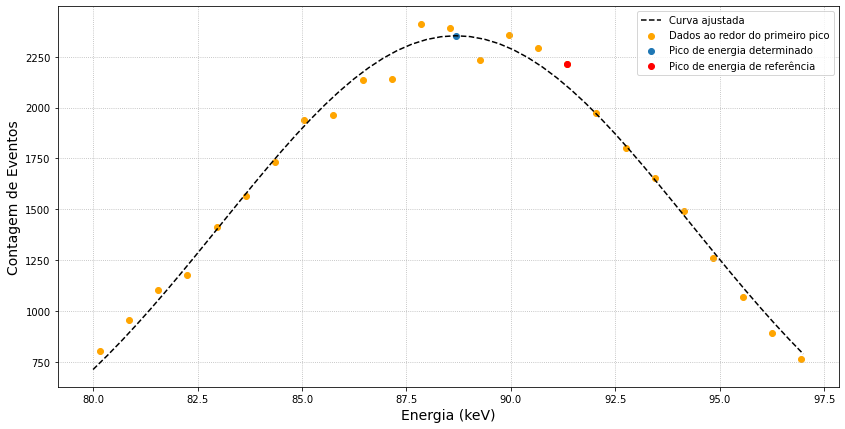

In [194]:
def GaussD(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataD_peak['Energy'])
p0 = (1000, 87.7, 17) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptD, pcovD = curve_fit(GaussD, dataD_peak['Energy'], dataD_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

errorD = [np.sqrt(pcovD[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x_D = np.linspace(80, 97)
plt.plot(x_D, GaussD(x_D, *poptD), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataD_peak['Energy'], dataD_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(poptD[1],poptD[0], label='Pico de energia determinado')
plt.scatter(91.347127, 2213, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.savefig('PeakFit_D.png', transparent = True)
plt.grid(linestyle='dotted')

In [ ]:
poptD, errorD

###6.5. Isótopo **E**

Fazendo uma comparação entre os picos de energia de referência e os estimados através do uso da reta de calibração, estima-se que o isótopo E é o isótopo do Cobalto 57.

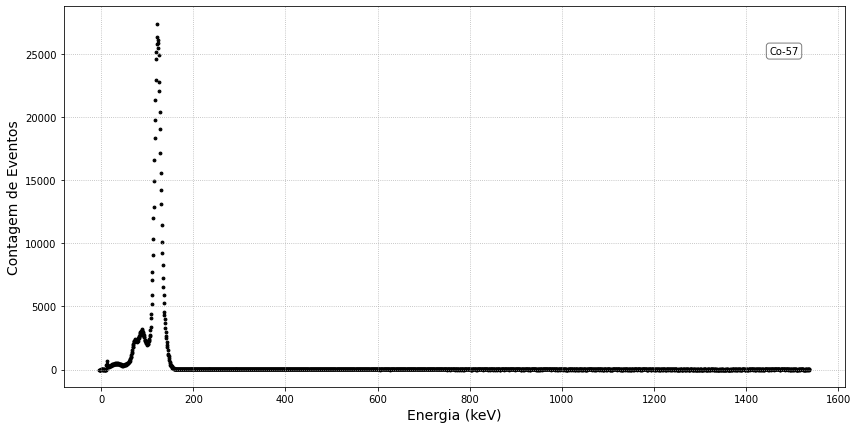

In [195]:
dataE = pd.read_table('E.tsv', skiprows=18)
dataE['Energy'] = coef1[0]*np.power(dataE['Chan'], 2) + coef1[1]*dataE['Chan'] + coef1[2]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataE['Energy'], dataE['Counts'], s=8, color='black')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1450, 25000, 'Co-57', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('dataE.png', transparent = True)
plt.grid(linestyle='dotted')

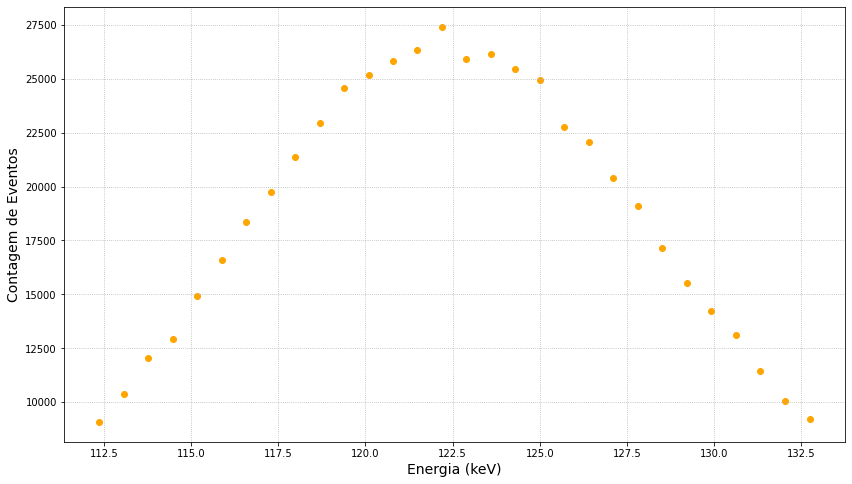

In [196]:
dataE_peak = dataE[(dataE['Energy']>=112)&(dataE['Energy']<=133)]

fig = plt.subplots(figsize=(14,8))
plt.scatter(dataE_peak['Energy'], dataE_peak['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

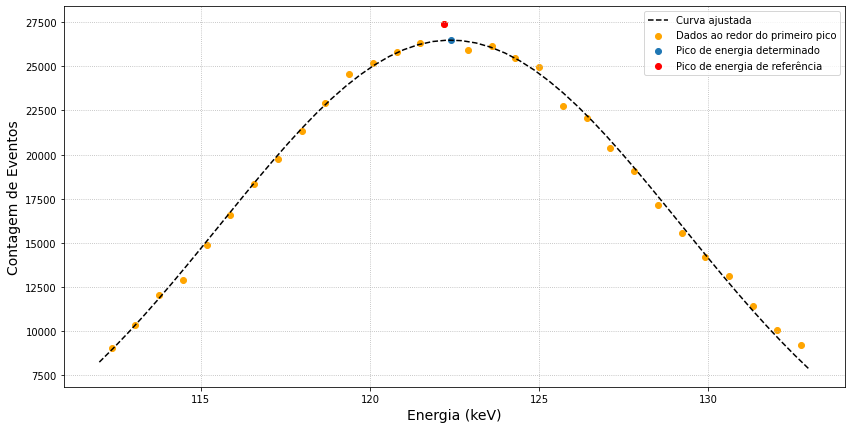

In [197]:
def GaussE(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataE_peak['Energy'])
p0 = (1000, 122.4, 20) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptE, pcovE = curve_fit(GaussE, dataE_peak['Energy'], dataE_peak['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

errorE = [np.sqrt(pcovE[i, i]) for i in np.arange(3)]

fig = plt.subplots(figsize=(14,7))
x_E = np.linspace(112, 133)
plt.plot(x_E, GaussE(x_E, *poptE), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataE_peak['Energy'], dataE_peak['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(poptE[1],poptE[0], label='Pico de energia determinado')
plt.scatter(122.190552, 27417, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.savefig('PeakFit_E.png', transparent = True)
plt.grid(linestyle='dotted')

In [198]:
poptE, errorE

(array([2.64817231e+04, 1.22385641e+02, 6.80217186e+00]),
 [128.7559455871019, 0.0394103344044328, 0.05034554279716536])

##7. Discrepância

In [199]:
#Cs137, Ba133, Na22, Co60, Ag110, Rb90m, Nm147, Co57

ref = np.array([662, 81, 353, 511, 1275, 1173, 1332, 657, 937, 931, 91, 122])
energia = np.array([poptCs137[1], popt1Ba133[1], popt2Ba133[1], popt1Na22[1], popt2Na22[1], popt1A[1], popt2A[1], popt1B[1], popt2B[1], poptC[1], poptD[1], poptE[1]])
err = np.array([errorCs137[1], error1Ba133[1], error2Ba133[1], error1Na22[1], error2Na22[1], error1A[1], error2A[1], error1B[1], error2B[1], errorC[1], errorD[1], errorE[1]])

disc = np.abs(ref - energia)
disc, 3 * err 

(array([2.64474749e+02, 4.04358434e+01, 1.55257827e+02, 2.08180589e+02,
        4.46444495e+02, 2.21285881e+00, 8.37174283e+00, 3.56650713e-01,
        1.73441736e+02, 1.02021283e+02, 2.31115740e+00, 3.85641298e-01]),
 array([0.32272572, 0.2162016 , 0.4237161 , 0.21091035, 0.5029326 ,
        0.89107354, 0.66141817, 0.34199016, 0.85614778, 0.32127439,
        0.19164344, 0.118231  ]))